In [76]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# importing metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [78]:
# Load cleaned dataset
features_columns = ['peso_avg', 'presion_avg', 'presion_max', 'visco_max']
target_columns = ['densidad_max']

df = pd.read_csv('cleaned_data.csv')
df = df[features_columns + target_columns]
df.head()

,peso_avg,presion_avg,presion_max,visco_max,densidad_max
0,0.0000,0.234332,0.234375,0.00000,0.000
1,4504.4478,1.237560,2.526042,559.38000,63897.484
2,5678.3500,1.288355,2.867477,579.17755,66975.870
3,29858.3710,1.915336,3.003472,717.00000,62665.250
4,4409.2380,1.260862,2.881945,900.00000,64876.690


In [79]:
# Setting X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
N_FOLDS = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
rf_model = RandomForestRegressor(n_estimators=100, random_state=22)

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=N_FOLDS)

CV Mean: 0.7719224305693593
CV STD: 0.25150628563546
[0.6888838  0.34141445 0.99841227 0.98425383 0.99272714 0.43022158
 0.47850223 0.84469294 0.99408128 0.96603478]


<Axes: title={'center': 'Cross-Validation Scores among 10 folds'}>

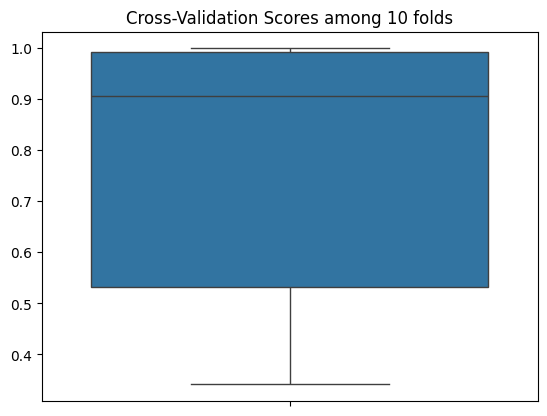

In [80]:
print(f'CV Mean: {cv_scores.mean()}')
print(f'CV STD: {cv_scores.std()}')
print(cv_scores)
plt.title(f'Cross-Validation Scores among {N_FOLDS} folds')
sns.boxplot(y=cv_scores)

In [81]:
# Train Model
rf_model.fit(X_train, y=y_train)

RandomForestRegressor(random_state=22)

In [82]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [83]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 4101.374030413803
MSE: 95760936.74502239
R2: 0.668147266806306
